In [1]:
!pip install datasets pandas nltk


In [2]:
from datasets import load_dataset
import pandas as pd


Loading Dataset


In [3]:
dataset = load_dataset("cnn_dailymail", "3.0.0")
dataset


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

3.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

3.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

3.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

Look at one real example

In [4]:
sample = dataset["train"][0]

print("ARTICLE:\n", sample["article"][:1000])
print("\nSUMMARY:\n", sample["highlights"])


ARTICLE:
 LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Deta

In [6]:
type(dataset["train"])


datasets.arrow_dataset.Dataset

In [7]:
dataset["train"][0]


{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

Measure document & summary length

Notes from error:
train_data = dataset["train"][:2000]

In HuggingFace datasets, slicing like this returns a dictionary of lists, not a list of samples.

In [11]:
import numpy as np

def word_count(text):
    return len(text.split())

# Correct slicing
train_data = dataset["train"].select(range(2000))

article_lengths = []
summary_lengths = []

for sample in train_data:
    article_text = sample["article"]
    summary_text = sample["highlights"]

    article_lengths.append(word_count(article_text))
    summary_lengths.append(word_count(summary_text))

avg_article_len = np.mean(article_lengths)
avg_summary_len = np.mean(summary_lengths)

avg_article_len, avg_summary_len


(np.float64(601.8115), np.float64(43.151))

Article and Summary Length Distribution

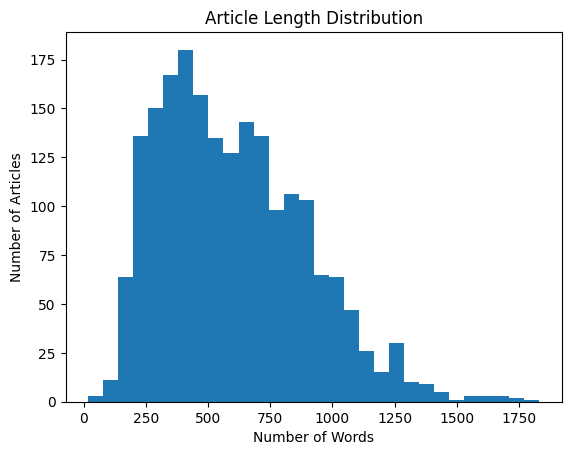

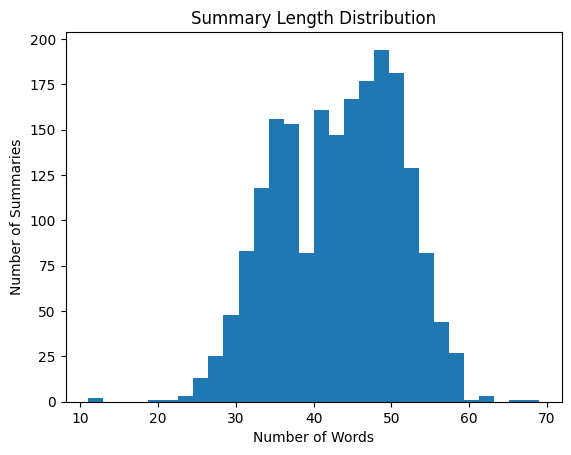

In [13]:
import matplotlib.pyplot as plt

# Plot Article Lengths
plt.hist(article_lengths, bins=30)
plt.title("Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.show()

# Plot Summary Lengths
plt.hist(summary_lengths, bins=30)
plt.title("Summary Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Summaries")
plt.show()


Compression ration calculation

In [14]:
compression_ratio = avg_article_len / avg_summary_len
compression_ratio


np.float64(13.946640865796853)